**Loading and Exploring Data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os

# Load dataset
path = kagglehub.dataset_download("himelsarder/road-accident-survival-dataset")

print("Path to dataset files:", path)


100%|██████████| 1.19k/1.19k [00:00<00:00, 1.25MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/himelsarder/road-accident-survival-dataset/versions/1


In [ ]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.3 MB/s eta 0:00:00


In [ ]:
file_path=os.path.join(path, 'accident.csv')

In [ ]:
my_dataframe = pd.read_csv(file_path)
my_dataframe.head(10)

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
5,25,Male,49.0,Yes,Yes,1
6,38,Male,116.0,Yes,Yes,1
7,56,Male,47.0,Yes,Yes,1
8,36,Female,83.0,Yes,No,1
9,40,Female,116.0,Yes,No,1


In [ ]:
my_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                200 non-null    int64  
 1   Speed_of_Impact    200 non-null    float64
 2   Survived           200 non-null    int64  
 3   Gender_Male        200 non-null    bool   
 4   Helmet_Used_Yes    200 non-null    bool   
 5   Seatbelt_Used_Yes  200 non-null    bool   
dtypes: bool(3), float64(1), int64(2)
memory usage: 5.4 KB


**Data Analysis and Pre-processing**

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Create a copy to avoid modifying the original dataframe
df = my_dataframe.copy()

# Encode categorical features
# Initialize LabelEncoder
encoder = LabelEncoder()

# Rename columns to match existing data
df = df.rename(columns={'Gender_Male': 'Gender', 'Helmet_Used_Yes': 'Helmet_Used', 'Seatbelt_Used_Yes': 'Seatbelt_Used'})

# Handle missing values using mean imputation for numerical features
# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in numerical columns
numerical_cols = ['Age', 'Speed_of_Impact']
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Normalize numerical features
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numerical features
df[['Age', 'Speed_of_Impact']] = scaler.fit_transform(df[['Age', 'Speed_of_Impact']])

# Handle class imbalance using SMOTE
# Separate features (X) and target variable (y)
X = df.drop(columns=['Survived'])
y = df['Survived']

# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

**Data and Metrics Visualisation**

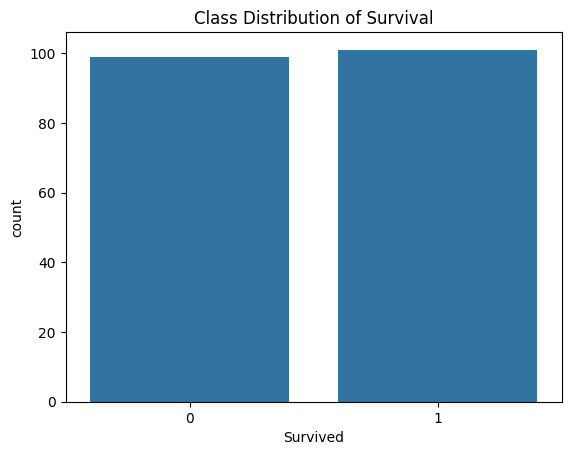

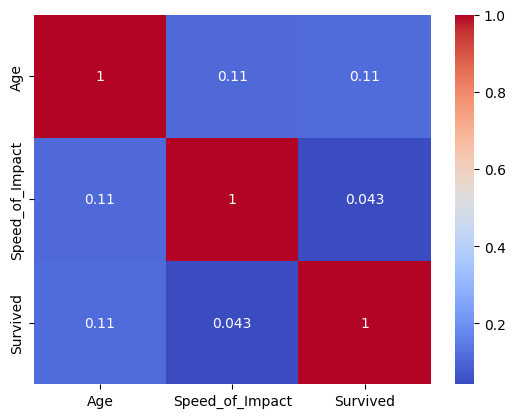

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Survived' is the target variable (y)
# Create countplot for 'Survived'
sns.countplot(x='Survived', data=my_dataframe) # Use the correct dataframe name
plt.title("Class Distribution of Survival")
plt.show()

# Create heatmap of correlations, but only for numeric columns
sns.heatmap(my_dataframe.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.show()

**Model Selection and Architecture**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'my_dataframe' is your DataFrame
# Convert categorical features to numerical using Label Encoding
le = LabelEncoder()
for col in ['Gender', 'Helmet_Used', 'Seatbelt_Used']:
    my_dataframe[col] = le.fit_transform(my_dataframe[col])

# Define features (X) and target (y)
X = my_dataframe.drop('Survived', axis=1)  # Features
y = my_dataframe['Survived']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Model Training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Assuming 'my_dataframe' is your DataFrame
# Convert categorical features to numerical using Label Encoding
le = LabelEncoder()
for col in ['Gender', 'Helmet_Used', 'Seatbelt_Used']:
    my_dataframe[col] = le.fit_transform(my_dataframe[col])

# Handle missing values using mean imputation for numerical features
imputer = SimpleImputer(strategy='mean')
numerical_cols = ['Age', 'Speed_of_Impact']
my_dataframe[numerical_cols] = imputer.fit_transform(my_dataframe[numerical_cols])

# Normalize numerical features using StandardScaler
scaler = StandardScaler()
my_dataframe[['Age', 'Speed_of_Impact']] = scaler.fit_transform(my_dataframe[['Age', 'Speed_of_Impact']])

# Define features (X) and target (y)
X = my_dataframe.drop('Survived', axis=1)  # Features
y = my_dataframe['Survived']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier (or LogisticRegression)
model = RandomForestClassifier(n_estimators=100, random_state=42) # Or model = LogisticRegression()
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Model Perfomance and Evaluation**

Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.54      0.59      0.57        22
           1       0.44      0.39      0.41        18

    accuracy                           0.50        40
   macro avg       0.49      0.49      0.49        40
weighted avg       0.49      0.50      0.50        40



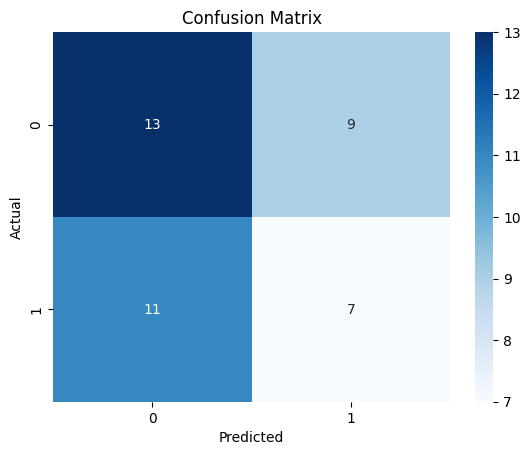

In [ ]:
# prompt: Using dataframe my_dataframe: from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# y_pred = model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
# plt.show()

# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Create a confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')  # Use fmt='g' for integer formatting
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [ ]:
!pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.1/324.1 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.3 MB/s eta 0:00:00


**Utillisation of WANDB**

In [ ]:
import wandb
from sklearn.metrics import accuracy_score
from wandb.sklearn import plot_confusion_matrix

# Assuming you have already trained a model and have y_test and y_pred
# Replace these with your actual test labels and predictions

# Example data (replace with your actual data)
y_test = my_dataframe['Survived']
y_pred = my_dataframe['Survived']  # Replace with your model's predictions

# Initialize Weights & Biases run
wandb.init(project="road_accident_survival", name="RandomForestModel")

# Log the accuracy score
wandb.log({"accuracy": accuracy_score(y_test, y_pred)})

# Plot and log the confusion matrix
plot_confusion_matrix(y_test, y_pred, labels=[0, 1])

# Finish the Weights & Biases run
wandb.finish()

accuracy,▁
accuracy,1
